In [ ]:
import os, time, random
import numpy as np
import pandas as pd
import cv2, torch
from tqdm.auto import tqdm
import shutil as sh

from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%time

!git clone https://github.com/ultralytics/yolov3  # clone repo
!pip install -U pycocotools
!pip install -qr yolov3/requirements.txt  # install dependencies
!cp yolov3/requirements.txt ./

fatal: destination path 'yolov3' already exists and is not an empty directory.
CPU times: user 41.3 ms, sys: 50.2 ms, total: 91.5 ms
Wall time: 5.5 s


In [ ]:
img_h, img_w, num_channels = (380, 676, 3)
df = pd.read_csv('/content/drive/MyDrive/TUM/assignment2/car-object-detection/data/train_solution_bounding_boxes (1).csv')
df.rename(columns={'image':'image_id'}, inplace=True)
df['image_id'] = df['image_id'].apply(lambda x: x.split('.')[0])
df['x_center'] = (df['xmin'] + df['xmax'])/2
df['y_center'] = (df['ymin'] + df['ymax'])/2
df['w'] = df['xmax'] - df['xmin']
df['h'] = df['ymax'] - df['ymin']
df['classes'] = 0
df['x_center'] = df['x_center']/img_w
df['w'] = df['w']/img_w
df['y_center'] = df['y_center']/img_h
df['h'] = df['h']/img_h
df.head()

,image_id,xmin,ymin,xmax,ymax,x_center,y_center,w,h,classes
0,vid_4_1000,281.259045,187.035071,327.727931,223.225547,0.450434,0.539817,0.068741,0.095238,0
1,vid_4_10000,15.163531,187.035071,120.329957,236.430180,0.100217,0.557191,0.155572,0.129987,0
2,vid_4_10040,239.192475,176.764800,361.968162,236.430180,0.444645,0.543678,0.181621,0.157014,0
3,vid_4_10020,496.483358,172.363256,630.020261,231.539575,0.833213,0.531451,0.197540,0.155727,0
4,vid_4_10060,16.630970,186.546010,132.558611,238.386422,0.110347,0.559122,0.171491,0.136422,0


index = list(set(df.image_id))
image = random.choice(index)
print("Image ID: %s"%(image))
img = cv2.imread(f'/content/drive/MyDrive/TUM/assigenment2/car-object-detection/data/training_images/{image}.jpg')
img.shape

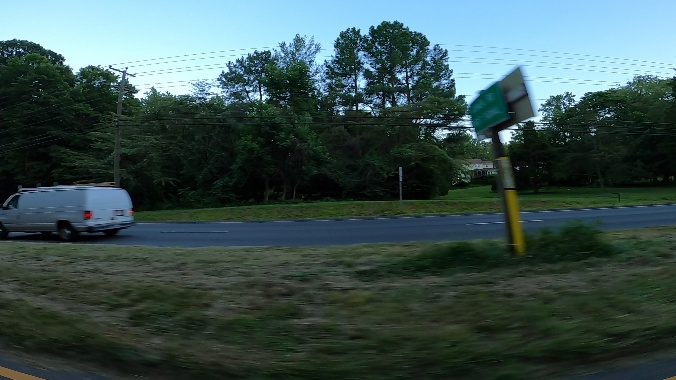

In [ ]:
index = list(set(df.image_id))
image = random.choice(index)
Image(filename=f'/content/drive/MyDrive/TUM/assignment2/car-object-detection/data/training_images/{image}.jpg',width=600)

In [ ]:
#Training
source = 'training_images'
if True:
    for fold in [0]:
        val_index = index[len(index)*fold//5:len(index)*(fold+1)//5]
        for name,mini in tqdm(df.groupby('image_id')):
            if name in val_index:
                path2save = 'val2017/'
            else:
                path2save = 'train2017/'
            if not os.path.exists('/content/tmp/convertor/fold{}/labels/'.format(fold)+path2save):
                os.makedirs('/content/tmp/convertor/fold{}/labels/'.format(fold)+path2save)
            with open('/content/tmp/convertor/fold{}/labels/'.format(fold)+path2save+name+".txt", 'w+') as f:
                row = mini[['classes','x_center','y_center','w','h']].astype(float).values
                row = row.astype(str)
                for j in range(len(row)):
                    text = ' '.join(row[j])
                    f.write(text)
                    f.write("\n")
            if not os.path.exists('/content/tmp/convertor/fold{}/images/{}'.format(fold,path2save)):
                os.makedirs('/content/tmp/convertor/fold{}/images/{}'.format(fold,path2save))
            sh.copy("/content/drive/MyDrive/TUM/assignment2/car-object-detection/data/{}/{}.jpg".format(source,name),'/content/tmp/convertor/fold{}/images/{}/{}.jpg'.format(fold,path2save,name))


  0%|          | 0/355 [00:00<?, ?it/s]

In [ ]:
###car.yaml example: (not run)

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
#path: ../datasets/coco128  # dataset root dir
#train: images/train2017  # train images (relative to 'path') 128 images
#val: images/train2017  # val images (relative to 'path') 128 images
#test:  # test images (optional)

# Classes
nc: 80  # number of classes
names: [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
         'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
         'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
         'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
         'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
         'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
         'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
         'hair drier', 'toothbrush' ]  # class names

In [ ]:
!python /content/yolov3/train.py --batch 4 --epochs 30 --data /content/drive/MyDrive/TUM/assignment2/car.yaml --cfg /content/drive/MyDrive/TUM/assignment2/yolov5s.yaml

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov3/yolov3.pt, cfg=/content/drive/MyDrive/TUM/assignment2/yolov5s.yaml, data=/content/drive/MyDrive/TUM/assignment2/car.yaml, hyp=yolov3/data/hyps/hyp.scratch.yaml, epochs=30, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=yolov3/runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov3 ✅
YOLOv3 🚀 v9.6.0-6-g0f80f2f torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)


In [ ]:
!python yolov3/detect.py --weights /content/yolov3/runs/train/exp/weights/best.pt --conf 0.3 --source /content/drive/MyDrive/TUM/assignment2/Police_Car.mp4
# conf:置信区间 越小 框越多越不准
# detect里 source的default改成"0"就是摄像头
# "yolo" RuntimeError: Given groups=1, weight of size expected input -> 修改train.py https://blog.csdn.net/qq_43533724/article/details/121743384

detect: weights=['/content/yolov3/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/TUM/assignment2/Police_Car.mp4, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov3/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-6-g0f80f2f torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/764) /content/drive/MyDrive/TUM/assignment2/Police_Car.mp4: 480x640 1 car, Done. (0.020s)
video 1/1 (2/764) /content/drive/MyDrive/TUM/assignment2/Police_Car.mp4: 480x640 1 car, Done. (0.017s)
video 1/1 (3/764) /content/drive/MyDrive/TUM/assignment2/Police_Car.mp4: 480x640 1 car, Done. (0.017s)
video 1/1 (4/764) /content/drive/

In [ ]:
#from IPython.display import HTML
#from base64 import b64encode
 
#def show_video(video_path, video_width = 600):
   
  #video_file = open(video_path, "r+b").read()
 
  #video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  #return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

#video_path = "/content/yolov3/runs/detect/exp2/160820_052_NYC_TaxisInRain2_1080p.mp4"
#show_video(video_path)